# Image Analysis - Homework 3
### Due October 16th, 2024
#### Problem 1 (Convolution and Filtering)

In [156]:
# Import your dang packages
import time
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

from scipy import ndimage
from skimage import io, color, filters
from PIL import Image

In [88]:
# load up the image to be convolved
crater_img = io.imread('images/homework_3/crater_lake.png')

# Make grayscale
if crater_img.shape[2] == 4:
    crater_rgb = crater_img[:, :, :3]  # Discard the alpha channel
    crater_gray = color.rgb2gray(crater_rgb)  # Convert RGB to grayscale
else:
    # If the image is not RGBA, assume it's already in RGB or grayscale
    crater_gray = color.rgb2gray(crater_img)
# print(gray_crater.shape) # Confirm values

# make the kernel 11x11 and normalize
kern = np.ones((11, 11)) / 121

plt.imsave('images/homework_3/crater_gray.png', crater_gray, cmap='gray')
# print(kern)

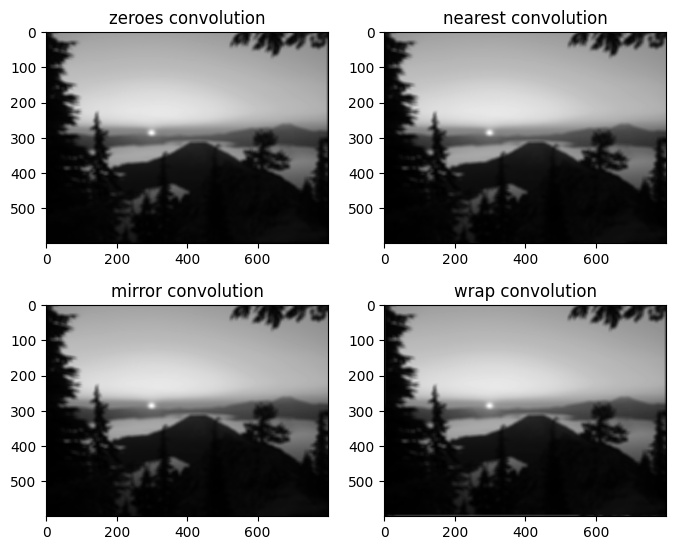

In [84]:
# convolve these bad jessies
conv_crater_zero = ndimage.convolve(crater_gray, kern, mode='constant', cval=0)
conv_crater_mir = ndimage.convolve(crater_gray, kern, mode='mirror')
conv_crater_wrap = ndimage.convolve(gray_crater, kern, mode='wrap')
conv_crater_near = ndimage.convolve(crater_gray, kern, mode='nearest')

fig, axes = plt.subplots(2, 2, figsize=(8, 6.5))
ax = axes.ravel()

ax[0].imshow(conv_crater_zero, cmap='gray')
ax[0].set_title('zeroes convolution')
# ax[0].axis('off')

ax[1].imshow(conv_crater_near, cmap='gray')
ax[1].set_title('nearest convolution')
# ax[1].axis('off')

ax[2].imshow(conv_crater_mir, cmap='gray')
ax[2].set_title('mirror convolution')
# ax[2].axis('off')

ax[3].imshow(conv_crater_wrap, cmap='gray')
ax[3].set_title('wrap convolution')
# ax[3].axis('off')

plt.tight_layout

plt.savefig('images/homework_3/convolution_grid.png')

# io.imshow(conv_crater_ref, cmap='gray')
# io.imshow(conv_crater_mir, cmap='gray')

#### This has workedwell so let's zoom in!

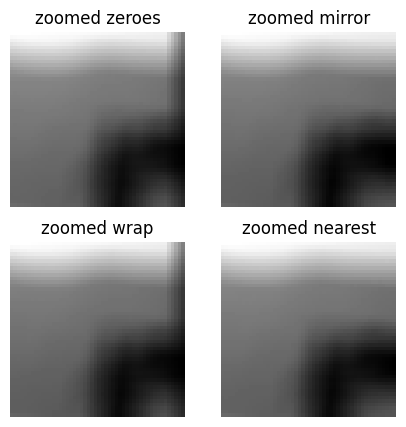

In [85]:
zoomed_zero = conv_crater_zero[275:325, 750:800]
zoomed_mir = conv_crater_mir[275:325, 750:800]
zoomed_wrap = conv_crater_wrap[275:325, 750:800]
zoomed_near = conv_crater_near[275:325, 750:800]

plt.figure(figsize=(5, 5))

plt.subplot(2, 2, 1)
plt.imshow(zoomed_zero, cmap='gray')
plt.title('zoomed zeroes')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(zoomed_mir, cmap='gray')
plt.title('zoomed mirror')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(zoomed_wrap, cmap='gray')
plt.title('zoomed wrap')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(zoomed_near, cmap='gray')
plt.title('zoomed nearest')
plt.axis('off')

plt.savefig('images/homework_3/zoomed_conv.png')
plt.show()

#### Problem 2 (Gaussian filter) (a)

In [145]:
tfj_img = io.imread('images/homework_3/tfj.png').astype(np.uint8)
tfj_rgb = tfj_img[:, :, :3]
tfj_gray = (color.rgb2gray(tfj_rgb)*255).astype(np.uint8)

plt.imsave('images/homework_3/tfj_gray.png', tfj_gray, cmap='gray')

In [146]:
# Function to make a gauss kernel
# May refactor this to take in any function?
def gauss_kernel(size, sig):
    # Need half size to center gaussian
    half_size = size // 2
    lsp = np.linspace(-half_size, half_size, size)

    # make evenly spaced fellers centered on the origin and grid them
    x, y = lsp, lsp
    x, y = np.meshgrid(x, y)

    # Keep r what it is so the final calculation looks normal
    r = np.sqrt(x**2 + y**2)

    # make the kernel and return normalized version
    kern = np.exp(-r**2 / (2 * sig**2))

    return kern / kern.sum()

In [162]:
# Declare some sigmas, a size, and make the two kernels
sig_1, sig_2 = 3, 20
size = 20

gk_1, gk_2 = gauss_kernel(size, sig_1), gauss_kernel(size, sig_2)

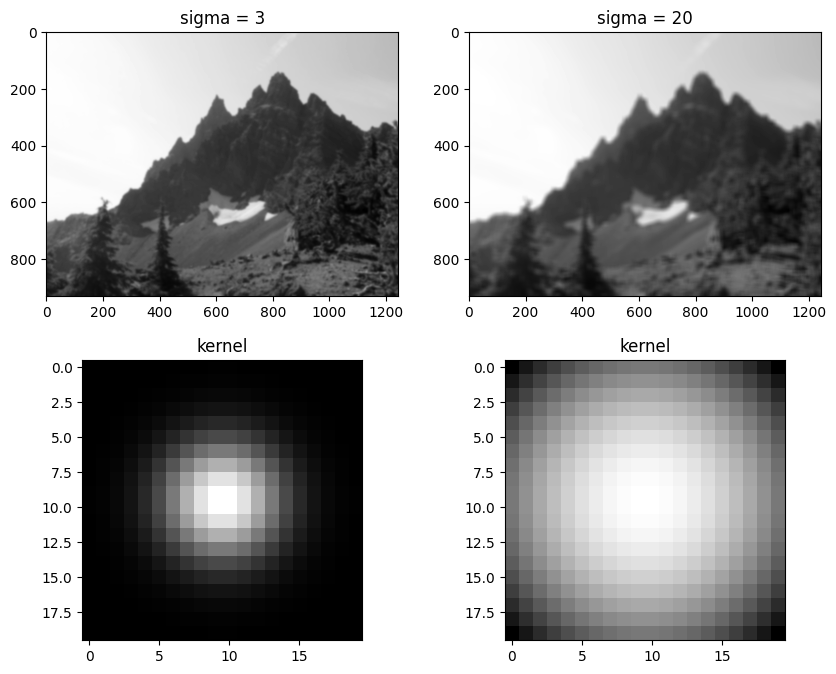

In [163]:
# Convolve and display the new images
tfj_gauss_1 = ndimage.convolve(tfj_gray, gk_1)
tfj_gauss_2 = ndimage.convolve(tfj_gray, gk_2)

fix, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.ravel()

ax[0].imshow(tfj_gauss_1, cmap='gray')
ax[0].set_title('sigma = 3')

ax[1].imshow(tfj_gauss_2, cmap='gray')
ax[1].set_title('sigma = 20')

ax[2].imshow(gk_1, cmap='gray')
ax[2].set_title('kernel')

ax[3].imshow(gk_2, cmap='gray')
ax[3].set_title('kernel')

plt.savefig('images/homework_3/gauss_conv_grid.png')

#### (b)

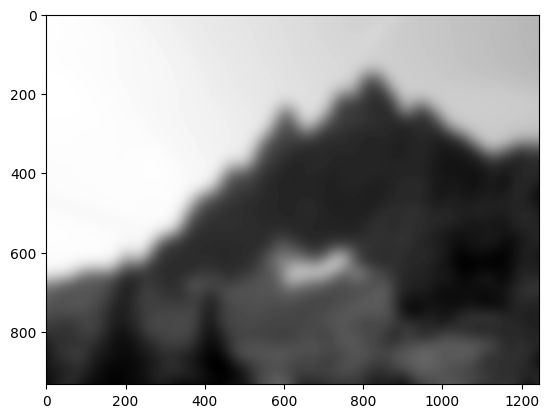

In [164]:
tfj_builtin_gauss = (filters.gaussian(tfj_gray, sigma=20)*255).astype(np.uint8)
plt.imshow(tfj_builtin_gauss, cmap='gray')

plt.savefig('images/homework_3/tfj_builtin_gauss.png')

#### (c)

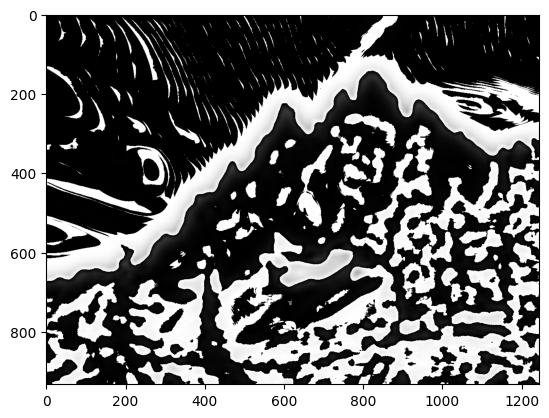

In [165]:
# Had to roll back and make sure my values were all uint8
gauss_diff = (tfj_builtin_gauss) - (tfj_gauss_2)
plt.imshow(gauss_diff, cmap='gray')
# print(np.min(gauss_diff), np.max(gauss_diff)) # used to make sure uint8

plt.savefig('images/homework_3/gauss_diff.png')

#### (d)

In [166]:
# Do the time analysis for 
t1 = time.time()
kern = gauss_kernel(size, 20)
timed_tfj_man = ndimage.convolve(tfj_gray, kern)
t2 = time.time()
manual_time = t2 - t1

t1 = time.time()
time_tfj_builtin = filters.gaussian(tfj_gray, sigma=20)
t2 = time.time()
builtin_time = t2 -t1

print('manual time:', manual_time)
print('builtin time:', builtin_time)

manual time: 0.4357619285583496
builtin time: 0.1830759048461914


###### After adjusting the kernel size this worked. However when I used a kernel size of 11, my manual method was faster by about 20ms.
###### The reason why the builtin function is faster is because it's seperable. What they do is break down an M x N matrix of values for the convolution kernel into 1D arrays, such that it is now only passed as an M + N operation. One is applied in the horizontal direction and one in the vertical, usually in that order. This makes the number of calculations O(n) instead of O(n²).